# Frontal Detection Analysis (superimpose climate fields on frontal ID maps)

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
file_path = "/glade/work/kdagon/FrontDetector/CESMOutputs/"

In [3]:
fronts_file = "cesm_fronts_2000-2005.nc"
onehot_file = "cesm_frontsOneHot_2000-2005.nc"
rates_file = "cesm_frontRates_2000-2005.nc"

## Read in predicted fronts file

In [4]:
pred_fronts = xr.open_dataset(file_path+fronts_file)

In [5]:
pfronts = pred_fronts.predicted_fronts

## Read in "onehot" fronts file

In [6]:
onehot = xr.open_dataset(file_path+onehot_file)

In [7]:
fronts = onehot.fronts

In [8]:
allfronts = fronts.argmax(dim='front')

## Read in sea level pressure field

In [9]:
cesm_file_path = "/glade/campaign/cgd/ccr/kdagon/dlfront/"

In [10]:
PSL = xr.open_mfdataset(cesm_file_path+'*PSL*', combine='by_coords')

In [11]:
SLP = PSL.PSL

## Superimpose two fields

In [13]:
import matplotlib.colors 
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

In [14]:
# making a custom colorbar with blue for cold, red for warm, grey for stationary, 
# purple for occluded, and white for none fronts.

cmap_all = matplotlib.colors.ListedColormap(['blue', 'red', 'grey', 'purple', 'w'])
bounds = [0, 0.99, 1.99, 2.99, 3.99, 4.99]
norm = matplotlib.colors.BoundaryNorm(bounds, cmap_all.N)

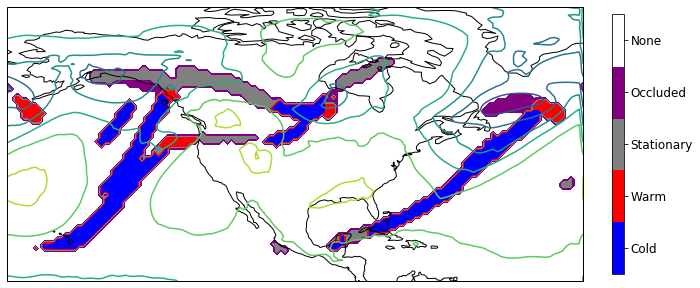

In [17]:
fig = plt.figure(figsize=(8,6))

ax = fig.add_axes([0.,0.,1.,1.], projection=ccrs.PlateCarree())
#ax = fig.add_subplot(projection=ccrs.PlateCarree())

# start with the first time index
field, lon = add_cyclic_point(allfronts[0,:,:], coord=allfronts.lon)
lat = allfronts.lat
cf = ax.contourf(lon, lat, field, cmap=cmap_all, vmin=0, vmax=4.99, levels=bounds, transform=ccrs.PlateCarree())

field, lon = add_cyclic_point(SLP[0,:,:], coord=SLP.lon)
c = ax.contour(lon, lat, field, transform=ccrs.PlateCarree())

ax.coastlines()

import matplotlib as mpl
cbar_ax = fig.add_axes([1.05, 0.2, 0.02, 0.6])
norm = mpl.colors.Normalize(vmin=0, vmax=4.99)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, 
                                cmap=cmap_all,
                                norm=norm,
                                orientation='vertical', 
                               ticks=bounds)
labels = np.array([0, 0.99, 1.99, 2.99, 3.99])
loc    = labels + .5
tick_1 = ['Cold','Warm','Stationary','Occluded','None']
cb1.set_ticks(loc)
cb1.ax.set_yticklabels(tick_1)
cb1.ax.tick_params(labelsize=12)

In [ ]:
# average for each year
allfronts.groupby("time.year").mean(dim="time")
